## Preparation

In [1]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.ticker as mtick

In [2]:
pro = ts.pro_api()

In [3]:
def get_daily(ts_code, start_date):
 '''
 To get specified index data and formalize it
 
 
 output: A dataframe corresponds to a data
 '''
 df = pro.daily(ts_code = ts_code, start_date = start_date, end_date = '')
 df['trade_date'] = pd.to_datetime(df['trade_date'].astype(str), format = '%Y-%m-%d')
 df.set_index('trade_date',inplace=True)
 return df.sort_index()

In [4]:
# 茅台
df1 = get_daily(ts_code = '600519.SH', start_date = '20200101')

In [5]:
# 五粮液
df2 = get_daily(ts_code = '000858.SZ', start_date = '20200101')

In [6]:
df1.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2020-01-02,600519.SH,1128.00,1145.06,1116.00,1130.00,1183.00,-53.00,-4.4801,148099.16,1.669684e+07
2020-01-03,600519.SH,1117.00,1117.00,1076.90,1078.56,1130.00,-51.44,-4.5522,130318.78,1.426638e+07
2020-01-06,600519.SH,1070.86,1092.90,1067.30,1077.99,1078.56,-0.57,-0.0528,63414.78,6.853918e+06
2020-01-07,600519.SH,1077.50,1099.00,1076.40,1094.53,1077.99,16.54,1.5343,47853.59,5.220697e+06
2020-01-08,600519.SH,1085.05,1095.50,1082.58,1088.14,1094.53,-6.39,-0.5838,25008.25,2.720372e+06


In [7]:
df2.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2020-01-02,000858.SZ,132.00,133.50,129.59,132.08,133.01,-0.93,-0.6992,306674.39,4038536.854
2020-01-03,000858.SZ,131.60,132.07,129.61,130.55,132.08,-1.53,-1.1584,204692.48,2672531.470
2020-01-06,000858.SZ,130.00,130.25,128.52,129.20,130.55,-1.35,-1.0341,259369.79,3353682.073
2020-01-07,000858.SZ,129.50,131.07,129.00,129.37,129.20,0.17,0.1316,223277.93,2901574.233
2020-01-08,000858.SZ,128.99,129.76,128.05,128.89,129.37,-0.48,-0.3710,161802.18,2083242.871


## 1. 相关性检验

In [8]:
df_t = pd.DataFrame({"c1": df1.close, "c2":df2.close})
df_t.corr()

,c1,c2
c1,1.000000,0.830935
c2,0.830935,1.000000


### 2. ADF 检验 (平稳性检验)

In [9]:
from statsmodels.tsa.stattools import adfuller
    
print(adfuller(df1.close))
print(adfuller(df2.close))

(-2.055634499119898, 0.26272409382886386, 0, 615, {'1%': -3.4410277306083668, '5%': -2.8662510413264357, '10%': -2.569278890210853}, 6016.702534184657)
(-1.6661504568525438, 0.44863170449675704, 0, 615, {'1%': -3.4410277306083668, '5%': -2.8662510413264357, '10%': -2.569278890210853}, 3818.0785142956975)


As p-values are greater than 0.5, we failed to reject the null hypothesis, and need to conclude that both sequences are not stationary.

In [10]:
print(adfuller(np.diff(df1.close)))
print(adfuller(np.diff(df2.close)))

(-12.084200021929998, 2.1967471597116567e-22, 3, 611, {'1%': -3.4410979308822967, '5%': -2.8662819588823423, '10%': -2.5692953639629166}, 6011.851922006317)
(-23.815349391479796, 0.0, 0, 614, {'1%': -3.4410451945636207, '5%': -2.8662587328558566, '10%': -2.569282988466721}, 3815.412464965263)


作一阶差分后，两序列都是平稳的，满足协整关系的前提。

### 3. 协整检验

In [11]:
from statsmodels.tsa.stattools import coint

print(coint(df1.close, df2.close))

(-1.3101036112097075, 0.8266660914315496, array([-3.91433661, -3.34608316, -3.05135345]))


p-value大于0.05，我们不能否决掉Null hypothesis：两序列非协整。

## Task 1: Visualize spread and z-score

In [12]:
spread = df1.close - df2.close

In [13]:
print(adfuller(spread))

(-2.0420786674075315, 0.26843311102714024, 0, 615, {'1%': -3.4410277306083668, '5%': -2.8662510413264357, '10%': -2.569278890210853}, 5858.347409099702)


Spread非平稳

In [14]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

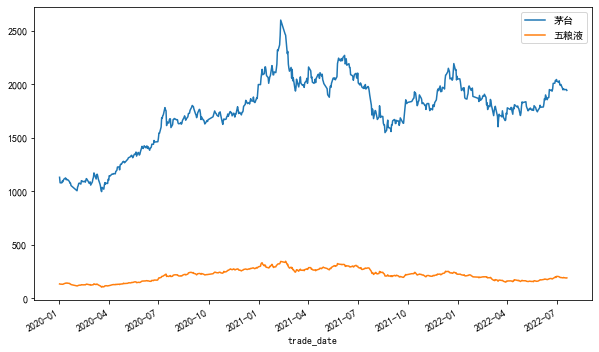

In [15]:
df1.close.plot(figsize = (10, 6), label = '茅台')
df2.close.plot(figsize = (10, 6), label = '五粮液')
plt.legend()

<AxesSubplot:xlabel='trade_date'>

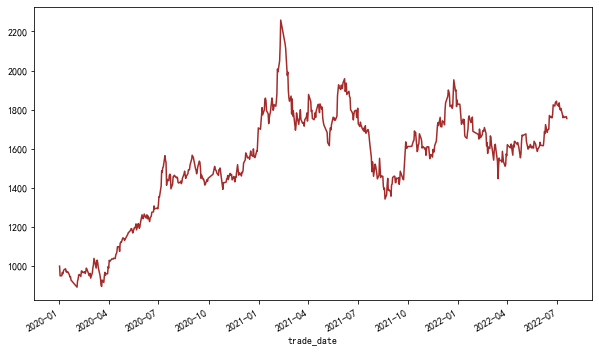

In [16]:
# spread
spread.plot(figsize = (10, 6), color = 'brown')

<AxesSubplot:xlabel='trade_date'>

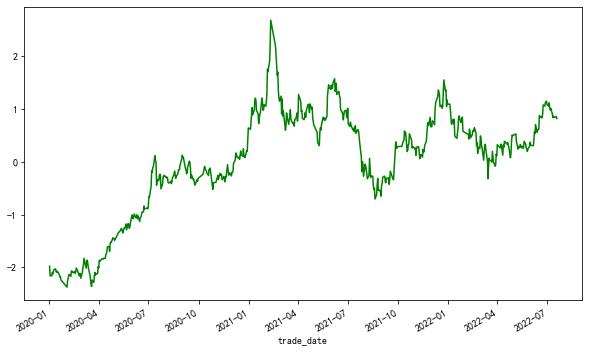

In [17]:
# z-score
z = (spread - np.mean(spread))/np.std(spread)

z.plot(figsize = (10, 6), color = 'green')

## Task 2: Trading Signal

In [18]:
def pair_trade(z):
    sigma = np.std(z)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(len(z)), z)
    ax.hlines(0, 0, len(z))
    ax.hlines(0.2 * sigma, 0, len(z), linestyle = '--', colors='g') # 开仓
    ax.hlines(-0.2 * sigma, 0, len(z), linestyle = '--', colors='g') # 平仓
    ax.hlines(1.5 * sigma, 0, len(z), colors='b')
    ax.hlines(-1.5 * sigma, 0, len(z), colors='b')
    ax.hlines(2.5 * sigma, 0, len(z), colors='r')
    ax.hlines(-2.5 * sigma, 0, len(z), colors='r')
    plt.show()

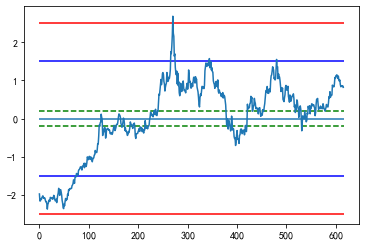

In [19]:
pair_trade(z)

- Case1: 當價差上穿 μ+1.5σ時，做空配對股票，反向建倉（賣出茅台；買進五粮液）。
- Case2: 當價差下穿 μ+0.2σ時，做多配對股票，平倉。
- Case3: 當價差上穿 μ−1.5σ時，做多配對股票，正向建倉（買進茅台；賣出五粮液）。
- Case4: 當價差上穿 μ−0.2σ時，做空配對股票，平倉。
- Case5: 當價差突破 μ±2.5σ時，即時平倉

In [20]:
mu = np.mean(z)
sd = np.std(z)

In [21]:
# 设置策略区间
level = (float('-inf'),mu-2.5*sd,mu-1.5*sd,mu-0.2*sd,mu+0.2*sd,mu+1.5*sd,mu+2.5*sd,float('inf'))

In [22]:
# 把交易期的价差序列按照触发区间标准分类【-2，+3】
prcLevel = pd.cut(z, level, labels=False) - 3 

In [23]:
np.unique(level)

array([-inf, -2.5, -1.5, -0.2,  0.2,  1.5,  2.5,  inf])

In [24]:
np.unique(prcLevel)

array([-2, -1,  0,  1,  2,  3], dtype=int64)

In [25]:
# 构造交易信号函数
def PairTradeSig(prcLevel):
    n = len(prcLevel)
    signal = np.zeros(n)
    for i in range(1,n):
        if prcLevel[i-1] == 1 and prcLevel[i] == 2:         # 价差从1区上穿2区，反向建仓 (case 1)
            signal[i] = -2
        elif prcLevel[i-1] == 1 and prcLevel[i] == 0:       # 价差从1区下穿0区，平仓 (case 2)
            signal[i] = 2
        elif prcLevel[i-1] == 2 and prcLevel[i] == 3:       # 价差从2区上穿3区，即突破3区，平仓 (case 5)
            signal[i] = 3
        elif prcLevel[i-1] == -1 and prcLevel[i] == -2:     # 价差从-1区下穿-2区，正向建仓 (case 3)
            signal[i] = 1
        elif prcLevel[i-1] == -1 and prcLevel[i] == 0:      # 价差从-1区上穿0区，平仓 (case 4)
            signal[i] = -1
        elif prcLevel[i-1] == -2 and prcLevel[i] == -3:     # 价差从-2区下穿-3区，即突破-3区，平仓 (case 5)
            signal[i] = -3
    return(signal)

In [26]:
# 设置每个每天的交易信号
signal = PairTradeSig(prcLevel)

signal:

    1:   正向建仓
    
    -1： 平仓
    
    2：  平仓
    
    -2： 反向建仓
    
    3：  平仓
    
    -3： 平仓

<AxesSubplot:xlabel='trade_date'>

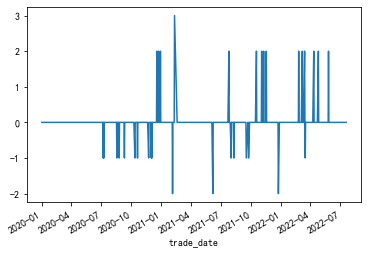

In [27]:
pd.Series(signal, index = df2.index).plot()

In [28]:
position = [signal[0]]
ns = len(signal)

In [29]:
# 设置每天开仓、平仓指令
for i in range(1,ns):
    position.append(position[-1])
    if signal[i] == 1:
        position[i] = 1                 # 价差从-1区下穿-2区，正向建仓: 买B卖A <------（价差为B-A), here B：茅台，A：五粮液
    elif signal[i] == -2:
        position[i] = -1               # 价差从1区上穿2区，反向建仓：卖B买A <------（价差为B-A）
    elif signal[i] == -1 and position[i-1] == 1:
        position[i] = 0                # 平仓
    elif signal[i] == 2 and position[i-1] == -1:
        position[i] = 0               # 平仓
    elif signal[i] == 3:
        position[i] = 0              # 平仓
    elif signal[i] == -3:
        position[i] = 0             # 平仓

In [30]:
position = pd.Series(position, index=df1.index)

<AxesSubplot:xlabel='trade_date'>

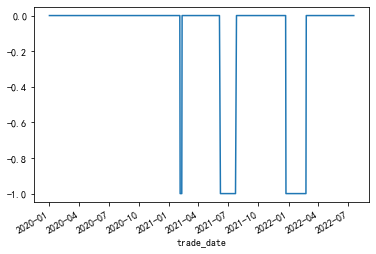

In [31]:
# 0: 平仓
# -1: 反向建仓
position.plot()

## Task 3: Cumulative Return

In [32]:
trade = pd.DataFrame({"mt": df1.close, "wly": df2.close, "position": position.shift(1)})

In [33]:
trade['return'] = np.select([trade['position'] == 1, 
                              trade['position'] == 0, 
                              trade['position'] == -1], 
                             [trade['mt'] * 1 + trade['wly'] * -1, 
                              0, 
                              trade['mt'] * -1 + trade['wly'] * 1], 
                           default = np.nan)

<AxesSubplot:xlabel='trade_date'>

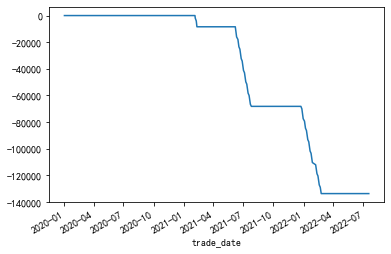

In [34]:
trade['return'].cumsum().plot()

In [35]:
np.unique(signal)

array([-2., -1.,  0.,  2.,  3.])

In [36]:
np.unique(position)

array([-1.,  0.])

我觉得之所以会出现负收益是因为，在我们的交易信号中没有出现正向建仓的信号。这就导致茅台总是只能处于卖出和持有的状态。而茅台的价格与五粮液差得不少，所以出现了一面倒的状况。

下面我尝试把茅台的价格和五粮液的价格standardized后，我们再来看看结果。

In [37]:
test_trade = pd.DataFrame({"mt": (df1.close - np.mean(df1.close))/np.std(df1.close), 
                      "wly": (df2.close - np.mean(df2.close))/np.std(df2.close), 
                      "position": position.shift(1)})

In [38]:
test_trade['return'] = np.select([test_trade['position'] == 1, 
                              test_trade['position'] == 0, 
                              test_trade['position'] == -1], 
                             [test_trade['mt'] * 1 + test_trade['wly'] * -1, 
                              0, 
                              test_trade['mt'] * -1 + test_trade['wly'] * 1], 
                           default = np.nan)

<AxesSubplot:xlabel='trade_date'>

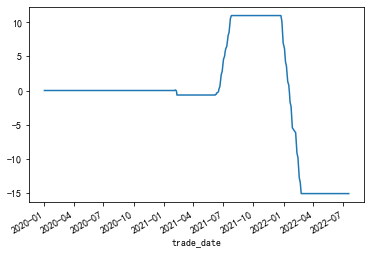

In [39]:
test_trade['return'].cumsum().plot()

现在我们可以看到，如果是在同一尺度下，我们的收益是存在过正收益得时刻的。